In [1]:
#Use nearest neighbors classifier to cluster given data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
%matplotlib inline


In [2]:
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

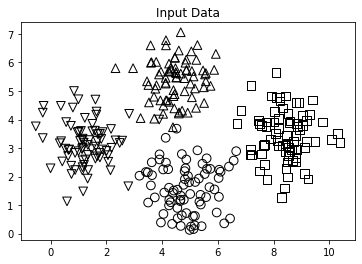

In [3]:
#Visualize given data
plt.figure()
plt.title('Input Data')
marker_shapes = 'v^os'

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = marker_shapes[y[i]], s=75, edgecolors = 'black', facecolors='none')
plt.show()

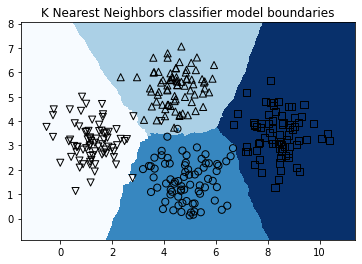

In [4]:
#find the num_neighbors closest neighbors to testing point, in this case, 12 nearest points
num_neighbors = 12

classifier = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')
classifier.fit(X, y)
step_size = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap = cm.Blues)

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = marker_shapes[y[i]], s = 50, edgecolors = 'black', facecolors = 'none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')
plt.show()


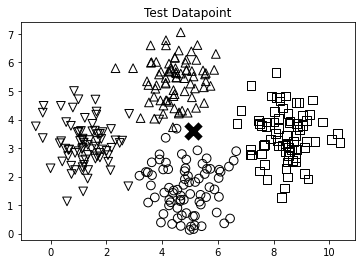

In [5]:
#If we test point test_datapoint, we can fill in the 12 nearest neighbors
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test Datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = marker_shapes[y[i]], s=75, edgecolors = 'black', facecolors = 'none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', linewidth = 6, s = 200, facecolors = 'black')
plt.show()

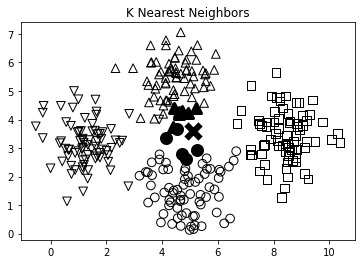

In [6]:
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker = marker_shapes[y[i]], linewidth = 3, s = 100, facecolors = 'black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', linewidth = 6, s =200, facecolors = 'black')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = marker_shapes[y[i]], s=75, edgecolors = 'black', facecolors = 'none')

plt.show()
#We see that it is most closely related to the triangle since majority - therefore we can classify as triangle.

In [7]:
#A more concrete approach to classification. Take the majority of its nearest neighbors.
print('K-Nearest Neighbors:')
for i in indices:
    print('({}, {}) -> {}'.format(X[i, 0], X[i, 1], y[i]))

print('Predicted Output:', classifier.predict([test_datapoint])[0])

K-Nearest Neighbors:
(4.52, 3.68) -> 2
(4.92, 4.24) -> 1
(5.27, 2.92) -> 2
(4.39, 3.73) -> 1
(4.6, 4.21) -> 1
(4.72, 4.31) -> 1
(4.61, 4.25) -> 1
(5.22, 4.41) -> 1
(4.71, 2.79) -> 2
(4.13, 3.36) -> 2
(4.87, 2.6) -> 2
(4.44, 4.39) -> 1
Predicted Output: 1
